## Loading the necessary libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Loading the dataset into a pandas dataframe

In [44]:
df_power_consumption = pd.read_csv("Electric power consumption.csv")
df_population_growth = pd.read_csv("Population growth.csv")

In [45]:
df_power_consumption.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,740.741606,703.908401,698.369914,686.728057,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,175.112546,185.515814,181.128875,186.199010,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,207.013351,219.253483,280.214482,312.228894,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_population_growth.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.377979,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017
1,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.539822,2.575182,2.606839,2.633213,2.656488,...,2.756619,2.763426,2.761496,2.750400,2.732598,2.712218,2.690902,2.665620,2.636666,2.605427
2,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,2.034308,2.085972,2.133725,2.173361,2.202845,2.226134,...,2.775171,2.763803,2.753564,2.745542,2.738332,2.730332,2.719330,2.704168,2.684152,2.660902
3,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.392891,1.383296,1.256405,0.973970,0.618450,...,3.634150,3.597755,3.551997,3.497447,3.438869,3.378269,3.322158,3.276145,3.242914,3.218530
4,Albania,ALB,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.577942


In [47]:
#Dropping the irrelevant columns

df_power_consumption = df_power_consumption.drop(['Country Code','Indicator Name','Indicator Code'], axis = 1)
df_population_growth = df_population_growth.drop(['Country Code','Indicator Name','Indicator Code'], axis = 1)

## Dealing with missing values

In [48]:
# To display all the values in the dataframe for our analysis
pd.set_option('display.max_rows', None)

In [49]:
#Counts and stores the number of missing values in each colunm

mv_power_consumption = np.array(df_power_consumption.isnull().sum())
mv_population_growth = np.array(df_population_growth.isnull().sum())

In [50]:
# Creating a dataframe to summarize the count of missing values in each column

mv_pc_summary = pd.DataFrame(df_power_consumption.columns.values, columns=['Column Names'])
mv_pc_summary['No of Missing Values'] = mv_power_consumption
mv_pc_summary = mv_pc_summary.set_index('Column Names')
mv_pc_summary.sort_values(by='No of Missing Values', ascending=False)

,No of Missing Values
Column Names,
2020,266
2015,265
2017,265
2018,265
2019,265
2016,265
1961,235
1962,235
1963,235


In [36]:
mv_pg_summary = pd.DataFrame(df_population_growth.columns.values, columns=['Column Names'])
mv_pg_summary['No of Missing Values'] = mv_population_growth
mv_pg_summary = mv_pg_summary.set_index('Column Names')
mv_pg_summary.sort_values(by='No of Missing Values', ascending = False)

,No of Missing Values
Column Names,
1960,261
1990,2
1993,2
1984,2
1985,2
1986,2
1987,2
1988,2
1989,2


#### Based on the number of missing values over the years in the Power Consumption dataframe, our analysis would be from year 1990 to 2014

In [51]:
#Creating a reduced dataset with the columns of interest

colnames = ['Country Name', '1990', '1991','1992', '1993', '1994', '1995', '1996', 
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
       '2013', '2014']

#Creating new dataframes with only the selected colunm names above

df_power_consumption = df_power_consumption[colnames]
df_population_growth = df_population_growth[colnames]

## Setting Missing values to zero

In [52]:
# We would set the remaining few missing values to zero
# This is not ideal, but for this assignment, that is what we would do

df_power_consumption_nmv = df_power_consumption.fillna(0)
df_population_growth_nmv = df_population_growth.fillna(0)

In [53]:
# Confirming that we no longer have any missing value

df_power_consumption_nmv.isnull().sum()
df_population_growth_nmv.isnull().sum()

Country Name    0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
dtype: int64

In [76]:
#Checking for countries with zero record.

df_power_consumption_nmv['Power Consumption'] = df_power_consumption_nmv.iloc[: , 1:].sum(axis = 1)
df_population_growth_nmv['Population Growth'] = df_population_growth_nmv.iloc[: , 1:].sum(axis = 1)

df_power_consumption_nmv[(df_power_consumption_nmv['Power Consumption'] < 1)]

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Power Consumption


In [56]:
# Deleting countries with zero record

df_power_consumption_nmv = df_power_consumption_nmv[~(df_power_consumption_nmv['Power Consumption'] < 1)]

## Checking the basic statistical properties


In [73]:
#df_power_consumption_nmv.describe()
df_population_growth_nmv.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,...,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,1.814261,1.703255,1.591187,1.538656,1.491885,1.452685,1.480335,1.480923,1.433554,1.395034,...,1.470657,1.503908,1.499380,1.500401,1.442896,1.385141,1.308720,1.325100,1.315810,1.292271
std,1.371001,1.367770,1.458735,1.528131,1.456959,1.320642,1.241340,1.290076,1.438758,1.521697,...,1.551348,1.736936,1.821589,1.760752,1.578098,1.436424,1.415364,1.359416,1.366949,1.287310
min,-1.803750,-3.104610,-5.538691,-6.766133,-5.837092,-4.165327,-3.629546,-3.207518,-5.924733,-10.955149,...,-1.628401,-1.596378,-1.994692,-2.382134,-2.259678,-2.096943,-2.628656,-3.097273,-4.300775,-4.533415
25%,0.683321,0.707014,0.650693,0.590004,0.571787,0.521898,0.642638,0.528878,0.542368,0.526673,...,0.525698,0.565246,0.530028,0.534077,0.506225,0.481642,0.422331,0.459271,0.478505,0.476287
50%,1.907338,1.881091,1.721892,1.689047,1.621648,1.541824,1.521854,1.493678,1.485345,1.413535,...,1.321458,1.281997,1.244542,1.293765,1.228026,1.198099,1.192832,1.174345,1.165439,1.151449
75%,2.766068,2.699118,2.619751,2.575149,2.505348,2.486335,2.415447,2.407977,2.283480,2.332398,...,2.364805,2.377004,2.357424,2.277897,2.289912,2.287108,2.264322,2.212921,2.216478,2.143492
max,9.298752,6.017009,5.802706,6.048669,5.644930,5.127893,5.510037,7.390991,8.117946,7.448638,...,13.869735,16.700200,17.512207,16.475576,14.143924,11.483371,9.231843,7.575373,7.349583,6.738894


## Using the total historic values, we would be looking of interestig clusters

In [100]:
## Creating the dataset that would be used for clustering

#mv_pg_summary = pd.DataFrame(df_population_growth.columns.values, columns=['Column Names'])
#mv_pg_summary['No of Missing Values'] = mv_population_growth
#mv_pg_summary = mv_pg_summary.set_index('Column Names')

#countries = df_power_consumption_nmv['Country Name'].values
cluster_dataset = pd.DataFrame(df_power_consumption_nmv['Country Name'].values, columns=['Country Names'])
cluster_dataset['Power Consumption'] = df_power_consumption_nmv['Power Consumption']
cluster_dataset['Population Growth'] = df_population_growth_nmv['Population Growth']
cluster_dataset = cluster_dataset.set_index('Country Names')

In [103]:
cluster_dataset

,Power Consumption,Population Growth
Country Names,,
Africa Eastern and Southern,0.000000e+00,53.082003
Africa Western and Central,5.691832e+04,67.830828
Angola,0.000000e+00,68.232893
Albania,1.076390e+04,85.527052
Arab World,8.940197e+03,-11.089867
United Arab Emirates,9.999685e+04,41.224196
Argentina,0.000000e+00,59.845699
Armenia,1.273622e+05,167.512496
Australia,8.024460e+05,28.312988


## Dealing with missing values and Normalising the data

In [102]:
cluster_dataset = cluster_dataset.fillna(0)

In [115]:
# Normalizing the data using Z-score
scaled_cluster_dataset = cluster_dataset.copy()

for colunm in scaled_cluster_dataset.columns:
    scaled_cluster_dataset[colunm] = (scaled_cluster_dataset[colunm] - 
                                      scaled_cluster_dataset[colunm].mean()) / scaled_cluster_dataset[colunm].std()


scaled_cluster_dataset

,Power Consumption,Population Growth
Country Names,,
Africa Eastern and Southern,-0.587212,0.608275
Africa Western and Central,-0.412359,1.122623
Angola,-0.587212,1.136645
Albania,-0.554145,1.739759
Arab World,-0.559748,-1.629644
United Arab Emirates,-0.280022,0.194748
Argentina,-0.587212,0.844151
Armenia,-0.195955,4.598906
Australia,1.877902,-0.255515


## Visualising the data

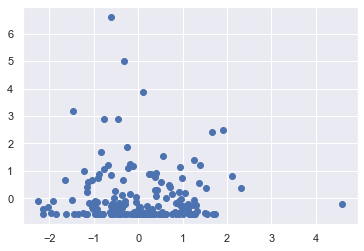

In [116]:
plt.scatter(scaled_cluster_dataset['Population Growth'],scaled_cluster_dataset['Power Consumption'])
plt.show()